Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 0s 57us/step - loss: 2.3832 - acc: 0.1483 - val_loss: 2.0595 - val_acc: 0.4410
Epoch 2/5
6000/6000 [==============================] - 0s 25us/step - loss: 2.0928 - acc: 0.2577 - val_loss: 1.8556 - val_acc: 0.5830
Epoch 3/5
6000/6000 [==============================] - 0s 24us/step - loss: 1.8715 - acc: 0.3805 - val_loss: 1.6725 - val_acc: 0.6450
Epoch 4/5
6000/6000 [==============================] - 0s 24us/step - loss: 1.6877 - acc: 0.4753 - val_loss: 1.5130 - val_acc: 0.6790
Epoch 5/5
6000/6000 [==============================] - 0s 24us/step - loss: 1.5261 - acc: 0.5455 - val_loss: 1.3693 - val_acc: 0.7290


<IPython.core.display.Javascript object>


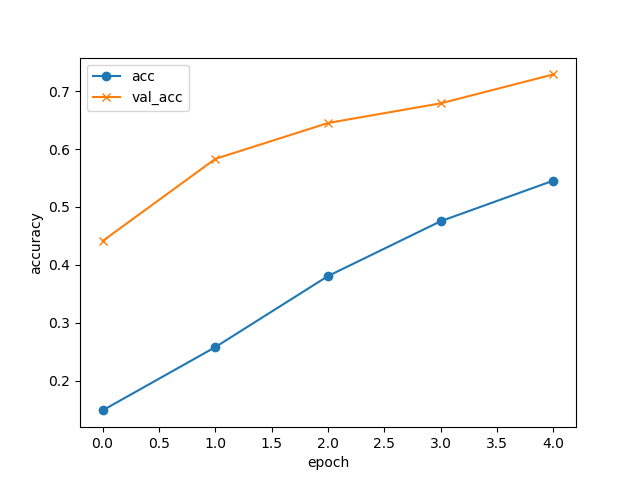

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# epochs数は5を指定
history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()